
========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-09-30<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sun Apr 16 16:50:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    45W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect and authorize google drive with google colab:**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


**Open our project directory in google drive:**

In [3]:
%cd gdrive/My\ Drive/cmpe258project/
!ls

/content/gdrive/My Drive/cmpe258project
checkpoints	     hardy_comments.pdf  __pycache__	   test.py
detection_custom.py  log		 README.md	   tools
evaluate_mAP.py      model_data		 reference.txt	   train.py
FlowChart	     prepare_data.py	 requirements.txt  yolov3


**Install all required libraries for our project:**

In [ ]:
!pip install -r ./requirements.txt

**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.3.0
'/device:GPU:0'
```

In [5]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.12.0


'/device:GPU:0'

**Import:**

In [6]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

**Start training custom model:**

In [ ]:
from train import *
tf.keras.backend.clear_session()
main()

**Create Yolo v3 custom model and load custom trained weights**

In [8]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov4_custom_Tiny") # use keras weights

**Test the detection with image**



1/1 [==============================] - 1s 620ms/step


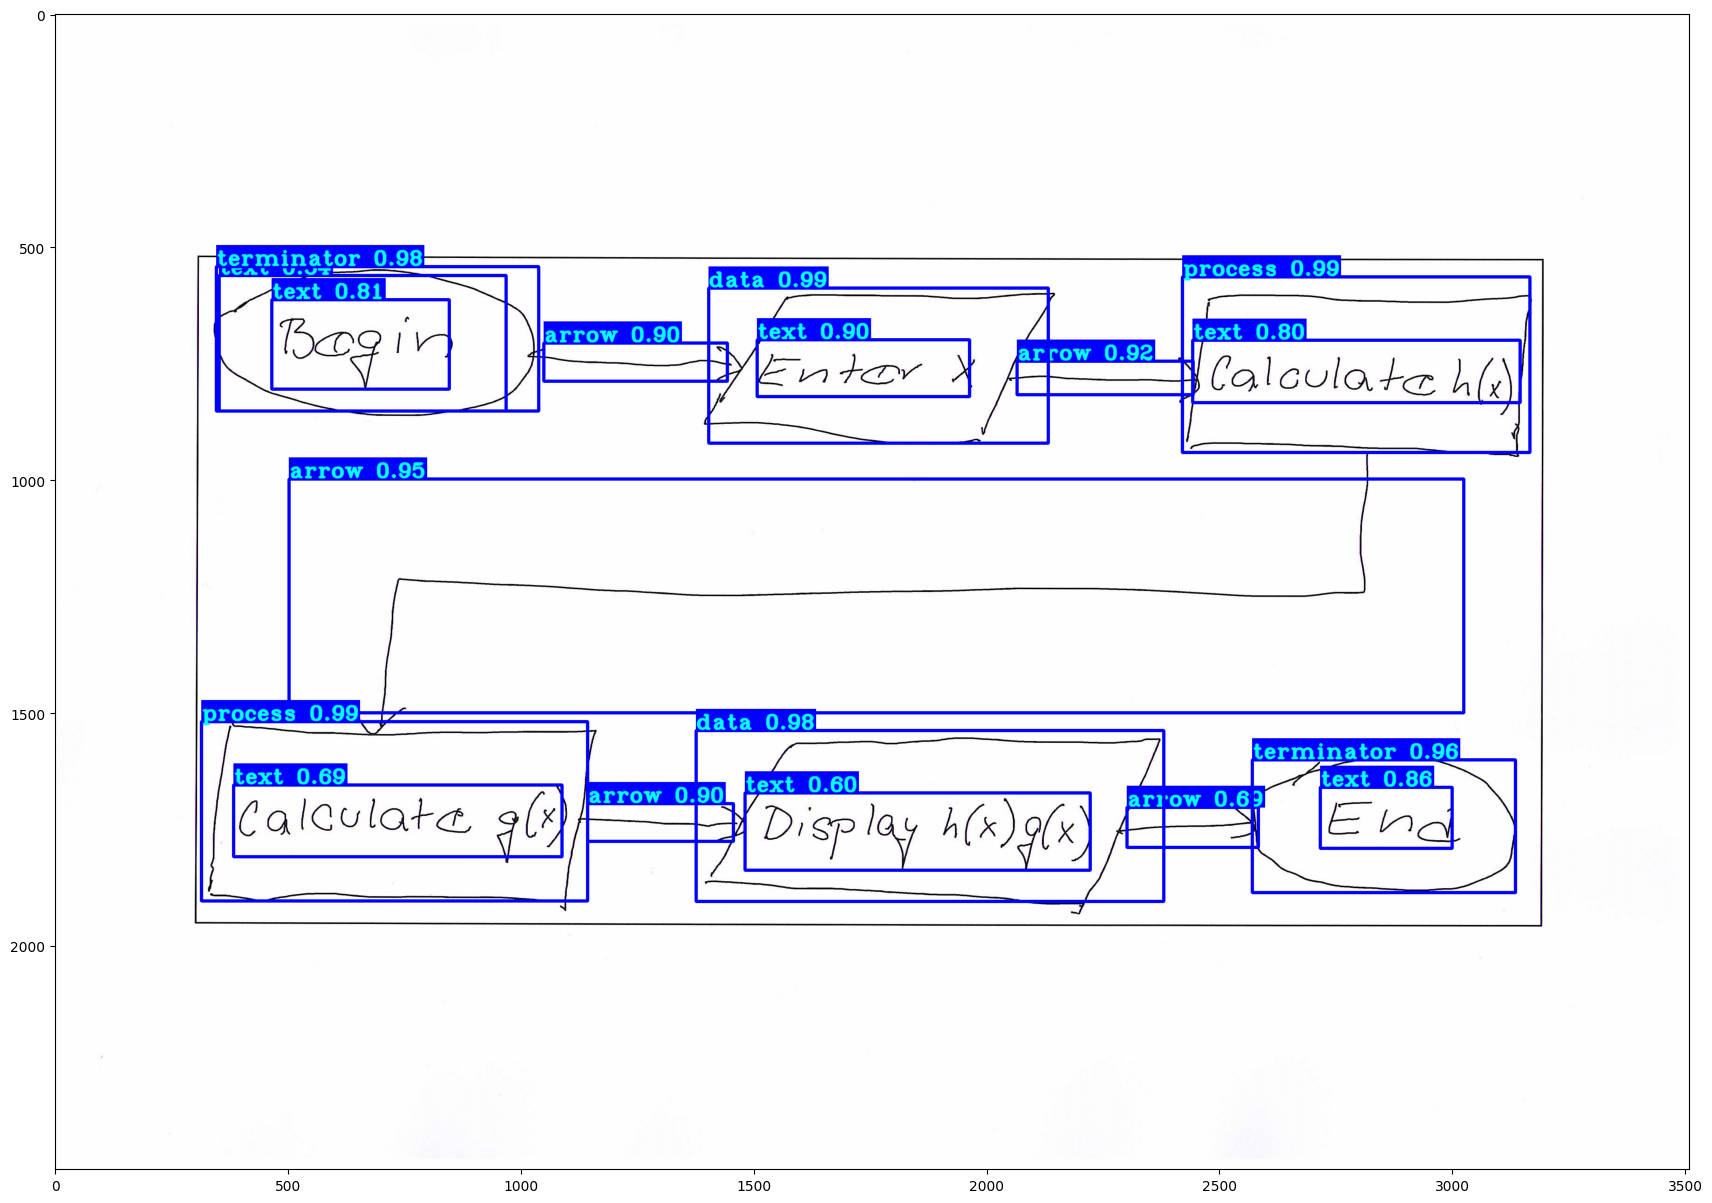

In [9]:
image_path   = "./FlowChart/FlowChart_test/writer000_fc_011.png"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

# **You just trained your first Yolo v3 custom object detector on google colab, GOOD JOB!!**